<a href="https://colab.research.google.com/github/gishnum/kmeans/blob/master/clustering_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/gishnum/kmeans/master/nutrient.csv',index_col=0)

In [0]:
from sklearn.preprocessing import StandardScaler
# Create scaler: scaler
scaler = StandardScaler()
df_scaled=scaler.fit_transform(df)

In [0]:
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)

In [0]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3,random_state=2019)

In [14]:
# Fit model to points
model.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2019, tol=0.0001, verbose=0)

In [15]:
#model.n_init
# Determine the cluster labels of new_points: labels
labels = model.predict(df_scaled)
print(labels)


[1 1 1 1 2 2 2 2 1 1 1 1 1 2 2 2 0 0 2 2 2 2 2 2 2 2 2]


In [0]:
clusterID = pd.DataFrame({'ClustID':labels})
clusteredData = pd.concat([df.reset_index(),clusterID],axis=1)

In [29]:
print(clusteredData)

              Food_Item  energy  protein  fat  calcium  iron  ClustID
0          BEEF BRAISED     340       20   28        9   2.6        2
1             HAMBURGER     245       21   17        9   2.7        3
2            BEEF ROAST     420       15   39        7   2.0        2
3            BEEF STEAK     375       19   32        9   2.6        2
4           BEEF CANNED     180       22   10       17   3.7        3
5       CHICKEN BROILED     115       20    3        8   1.4        3
6        CHICKEN CANNED     170       25    7       12   1.5        3
7            BEEF HEART     160       26    5       14   5.9        3
8        LAMB LEG ROAST     265       20   20        9   2.6        2
9   LAMB SHOULDER ROAST     300       18   25        9   2.3        2
10           SMOKED HAM     340       20   28        9   2.5        2
11           PORK ROAST     340       19   29        9   2.5        2
12        PORK SIMMERED     355       19   30        9   2.4        2
13          BEEF TON

In [18]:
print(model.inertia_)


61.538712936940485


In [0]:
clustNos = [2,3,4,5,6,7,8,9,10]
Inertia = []

for i in clustNos :
    model = KMeans(n_clusters=i,random_state=2019)
    model.fit(df_scaled)
    Inertia.append(model.inertia_)

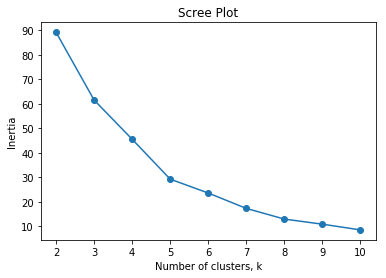

In [22]:
# Import pyplot
import matplotlib.pyplot as plt

plt.plot(clustNos, Inertia, '-o')
plt.title("Scree Plot")
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(clustNos)
plt.show()

In [0]:
# Create a KMeans instance with clusters: Best k model
model = KMeans(n_clusters=4)

In [0]:
# Fit model to points
model.fit(df_scaled)
#model.n_init
# Determine the cluster labels of new_points: labels
labels = model.predict(df_scaled)


In [0]:
clusterID = pd.DataFrame(labels)
clusteredData = pd.concat([df.reset_index(drop=True),clusterID],axis=1)

In [33]:
print(clusteredData)

    energy  protein  fat  calcium  iron  0
0      340       20   28        9   2.6  0
1      245       21   17        9   2.7  0
2      420       15   39        7   2.0  0
3      375       19   32        9   2.6  0
4      180       22   10       17   3.7  1
5      115       20    3        8   1.4  1
6      170       25    7       12   1.5  1
7      160       26    5       14   5.9  1
8      265       20   20        9   2.6  0
9      300       18   25        9   2.3  0
10     340       20   28        9   2.5  0
11     340       19   29        9   2.5  0
12     355       19   30        9   2.4  0
13     205       18   14        7   2.5  1
14     185       23    9        9   2.7  1
15     135       22    4       25   0.6  1
16      70       11    1       82   6.0  3
17      45        7    1       74   5.4  3
18      90       14    2       38   0.8  1
19     135       16    5       15   0.5  1
20     200       19   13        5   1.0  1
21     155       16    9      157   1.8  1
22     195 

In [0]:
## Using Pipeline
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [0]:
# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)


In [0]:
# Fit the pipeline to samples
pipeline.fit(df_scaled)

# Calculate the cluster labels: labels
labels = pipeline.predict(df_scaled)


In [37]:
# Display ct
print(labels)

[1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 2 2 3 3 0 3 3 3 3 0 0]
